In [49]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

%matplotlib inline

We were motivated to make this scraper to be able to generate customizable datasets that describe movies. The datasets available from imdb are numerous, but specific and scope containing only a few features. These datasets are also extremely large, containing examples for like all the movies. 

Our scraper is completely customizable, since we have set it up to recieve a url for any custom IMDB search. Using this search, we can collect data sets of movies based on any category from director, to actor, to release date. This dynamic search will allow the user to get any kind data set we want for any kind of analysis. In our project we will demonstrate various methods of analyis based off of one such search. 

We can collect as many movies as we want.

In [40]:
movies = pd.read_csv('df_final.csv', index_col=0)

In [92]:
movies['gross_usa'].describe()

count    3.037000e+03
mean     3.719413e+06
std      2.940848e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.000596e+08
Name: gross_usa, dtype: float64

### My New Proposal For the Analysis Section

- explore and plot features 
    - figure out what is interesting and what we can actually use
- model on what we have explored and decided can be used
- talk about how we can futher develop this data set
    - porpose new classification method for directors, actors, writers. Too many to one hot encode (unless we were to search only based on a finite list of actors)

### Plot Distribution of the Budget

### GENRES

WE HAVE QUESTIONS for this data set

- we probably want to ask questions about how these features are reported. 3 genres listed probably has more to do with the marketing of the movie than it does with any artistic impulse. 
    - one way we could test this is by seeing if certain production companies are associated with having more of the genre things populated. 
    - we could also plot number of genre against the budget and/or the earnings of the film.
- once some questions are answered with regard to how genre is reported, it would be interesting to see if certain combinations of genre lead to a more profitable film
    - can do correlation stuff
    - but can ALSO try to predict budget given what kind of genre it is. 
        - MAYBE make features for genre and all the other features I'm interested in and try one round of prediction, just the one. And all the other plotting and stuff builds to this

### review_count
- very interested in how review count compares to the budget and the earnings. 
- usable as a variable

### director, star, writer
-  we would love to work with these features, there is a lot to be explored in the interplay between directors, writers, actors, and their collabvorations
    - as these features stand, there are just way to many actors and directors to one hot encode all of them. 

- it would be useful in a business context to have a deeper, data-driven understanding of what kinds of collaborations lead to succesful films.  
    - propose a target of dollar made per dollar spent???? prettttttyyy neat
    - this would take a complete rethinkin of the way films are 'rated'. As data scientists, we have the power to do this with real, data-driven insights
- If we could define a classification system for directors
    - big/low budegt
    - weighted by number of films made
- come up with something similar for actors and writers
    

### Trying to Find something in a plot

Loose Correlation

# THIS IS ALL PART OF THE EXPERIMENTS LOL

In [57]:
movies_wrevs = movies.loc[movies['review_count']>0]

/Users/williamegan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


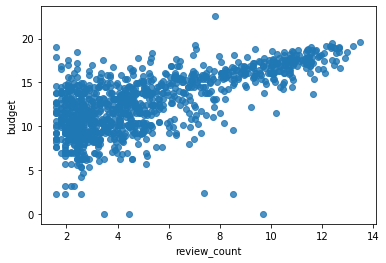

In [93]:
sns.regplot(np.log(movies_wrevs['review_count']), np.log(movies_wrevs['budget']))

Much less correlated TALK ABOUT SCALING

/Users/williamegan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


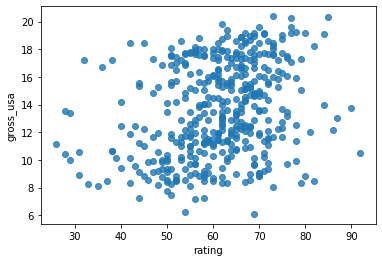

In [59]:
sns.regplot(movies_wrevs['rating'], np.log(movies_wrevs['gross_usa']))

/Users/williamegan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/williamegan/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


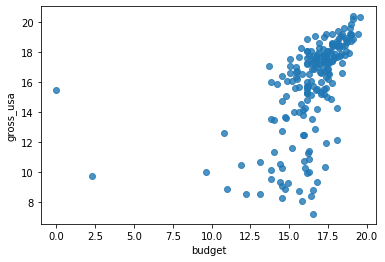

In [87]:
sns.regplot(np.log(movies['budget']), np.log(movies['gross_usa']))

In [88]:
movies.describe()

,Year,runtime,budget,gross_usa,rating,star_3,writer_2,review_count,open_week,cumulative,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
count,3037.000000,3037.00000,3.037000e+03,3.037000e+03,3037.000000,673.0,2533.0,3037.000000,3.037000e+03,3.037000e+03,...,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000
mean,1984.202502,59.37109,7.991943e+06,3.719413e+06,30.123148,0.0,0.0,5058.216332,9.099665e+11,1.050436e+07,...,0.014488,0.055318,0.000988,0.066842,0.051696,0.010537,0.000329,0.154429,0.011525,0.006256
std,259.356991,53.60805,1.355905e+08,2.940848e+07,31.320562,0.0,0.0,30426.544230,8.858338e+12,7.994690e+07,...,0.119511,0.228637,0.031419,0.249790,0.221449,0.102123,0.018146,0.361419,0.106750,0.078861
min,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,79.00000,1.200000e+04,0.000000e+00,25.000000,0.0,0.0,6.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,98.00000,2.500000e+05,0.000000e+00,61.000000,0.0,0.0,204.000000,0.000000e+00,4.666200e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,808.00000,6.000000e+09,7.000596e+08,95.000000,0.0,0.0,730792.000000,2.576982e+14,2.048360e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
movies.loc[movies['review_count'] > 200].describe()

,Year,runtime,budget,gross_usa,rating,star_3,writer_2,review_count,open_week,cumulative,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
count,764.000000,764.000000,7.640000e+02,7.640000e+02,764.000000,6.0,497.0,764.000000,7.640000e+02,7.640000e+02,...,764.000000,764.000000,764.0,764.000000,764.000000,764.000000,764.0,764.000000,764.000000,764.000000
mean,2018.244764,100.446335,1.993147e+07,1.477363e+07,58.980366,0.0,0.0,20055.157068,3.615025e+12,4.150372e+07,...,0.010471,0.126963,0.0,0.113874,0.083770,0.013089,0.0,0.261780,0.024869,0.005236
std,0.430229,36.178218,2.191749e+08,5.725205e+07,11.894617,0.0,0.0,58161.692347,1.739094e+13,1.553822e+08,...,0.101858,0.333150,0.0,0.317867,0.277224,0.113730,0.0,0.439892,0.155828,0.072215
min,2018.000000,0.000000,0.000000e+00,0.000000e+00,19.000000,0.0,0.0,201.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2018.000000,90.000000,0.000000e+00,0.000000e+00,53.000000,0.0,0.0,655.750000,0.000000e+00,2.465625e+04,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,2018.000000,100.000000,0.000000e+00,0.000000e+00,61.000000,0.0,0.0,2323.000000,0.000000e+00,4.873970e+05,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,2018.000000,111.250000,7.000000e+06,1.232629e+06,67.000000,0.0,0.0,11195.500000,7.541915e+10,9.316390e+06,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
max,2019.000000,808.000000,6.000000e+09,7.000596e+08,91.000000,0.0,0.0,730792.000000,2.576982e+14,2.048360e+09,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [ ]:
movies[]

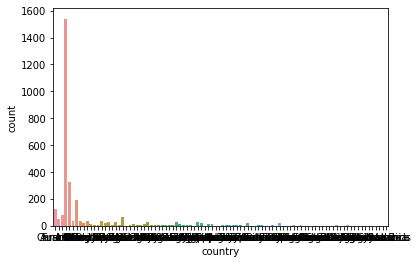

In [96]:
sns.countplot(x='country', data=movies)

In [98]:
movies.loc[movies['country'] == 'USA'].describe()

,Year,runtime,budget,gross_usa,rating,star_3,writer_2,review_count,open_week,cumulative,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
count,1540.000000,1540.000000,1.540000e+03,1.540000e+03,1540.000000,238.0,1293.0,1540.000000,1.540000e+03,1.540000e+03,...,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,1982.674026,56.657792,4.030732e+06,5.876238e+06,27.644805,0.0,0.0,6685.403247,1.506456e+12,1.386571e+07,...,0.014935,0.050000,0.001299,0.065584,0.060390,0.009091,0.000649,0.171429,0.009091,0.007143
std,264.944525,49.226325,2.016743e+07,3.903023e+07,30.541663,0.0,0.0,38142.326559,1.205021e+13,9.976463e+07,...,0.121332,0.218016,0.036026,0.247635,0.238285,0.094943,0.025482,0.377005,0.094943,0.084240
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,4.000000e+03,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,75.000000,2.500000e+04,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,94.000000,2.500000e+05,0.000000e+00,57.000000,0.0,0.0,110.750000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,360.000000,3.210000e+08,7.000596e+08,95.000000,0.0,0.0,730792.000000,2.576982e+14,2.048360e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
movies_budg

,Year,country,language,production_co,runtime,budget,gross_usa,director_0,director_1,rating,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
1,2018,France,English,Universal Pictures,85.0,7.500000e+07,270620950.0,Yarrow Cheney,Scott Mosier,63.0,...,0,0,0,0,0,0,0,0,0,0
3,2018,USA,English,Lucasfilm,135.0,2.750000e+08,213767512.0,Ron Howard,0,69.0,...,0,0,0,0,1,0,0,0,0,0
4,2018,UK,English,GK Films,134.0,5.200000e+07,216428042.0,Bryan Singer,0,80.0,...,0,0,0,0,0,0,0,0,0,0
5,2018,USA,English,Marvel Studios,149.0,3.210000e+08,678815482.0,Anthony Russo,Joe Russo,85.0,...,0,0,0,0,1,0,0,0,0,0
6,2018,USA,English,DC Comics,143.0,1.600000e+08,335061807.0,James Wan,0,70.0,...,0,0,0,0,1,0,0,0,0,0
8,2018,USA,English,Closest to the Hole Productions,118.0,4.800000e+07,67363237.0,Sean Anders,0,73.0,...,0,0,0,0,0,0,0,0,0,0
9,2018,USA,English,Sony Pictures Entertainment (SPE),117.0,9.000000e+07,190241310.0,Bob Persichetti,Peter Ramsey,84.0,...,0,0,0,0,0,0,0,0,0,0
10,2018,USA,English,Participant,130.0,2.300000e+07,85080171.0,Peter Farrelly,0,82.0,...,0,0,0,0,0,0,0,0,0,0
12,2018,Ireland,English,Fox Searchlight Pictures,119.0,1.500000e+07,34366783.0,Yorgos Lanthimos,0,76.0,...,0,0,0,0,0,0,0,0,0,0
13,2018,USA,English,Marvel Studios,134.0,2.000000e+08,700059566.0,Ryan Coogler,0,73.0,...,0,0,0,0,1,0,0,0,0,0


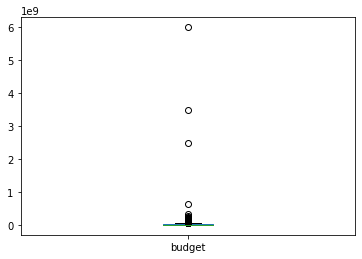

In [83]:
movies_budg['budget'].plot.box()

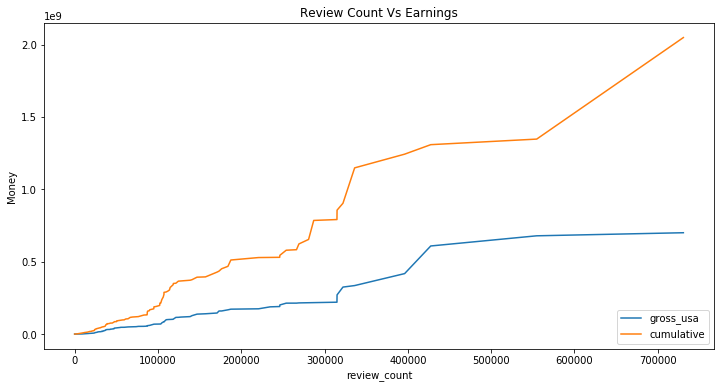

In [48]:
fig = plt.figure(figsize = (12, 6))

plt.plot(movies['review_count'].sort_values(), movies['gross_usa'].sort_values(), label = 'gross_usa')
#plt.scatter(movies['review_count'], movies['open_week'], label = 'open_week')
plt.plot(movies['review_count'].sort_values(), movies['cumulative'].sort_values(), label = 'cumulative')

plt.xlabel('review_count')
plt.ylabel('Money')
plt.title('Review Count Vs Earnings')
plt.legend(loc="lower right")

Below we see that as budget goes up, so do the earnings of the movies. This is important to note if we want to predict on this data, set, as budget could be an instance of leakage if we wantd to predict on earnings, or alternatively very powerful

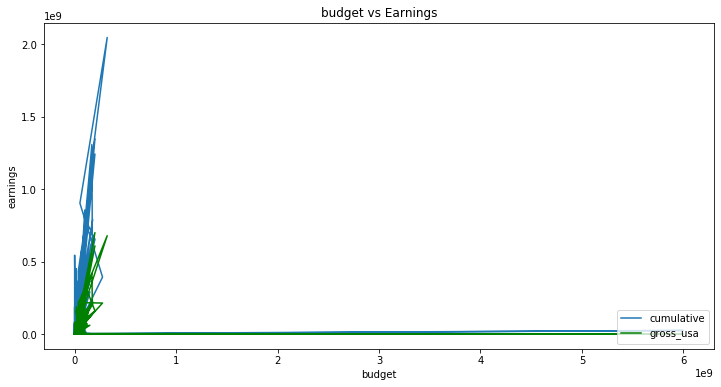

In [60]:
fig = plt.figure(figsize = (12, 6))

plt.plot(np.log(movies['budget']), movies['cumulative'], label = 'cumulative')
#plt.plot(movies['budget'], movies['gross_usa'], 'g', label = 'gross_usa')

#plt.plot(movies['budget'].sort_values(), movies['open_week'].sort_values(), 'r', label = 'open_week',)

plt.xlabel('budget')
plt.ylabel('earnings')
plt.title('budget vs Earnings')
plt.legend(loc="lower right")
plt.show()

A lot of interesting things to observe about this plot

look how MUCH it shoots up at the end. The highest budget things are going for the foreign audience.

### Release Month and Year
- interseting to see what time of the year something comes out. An important indicator of how many people see it. Lot of big budget stuff usually happens in the summer and in december


In [6]:
fig = plt.figure(figsize = (12, 6))

plt.scatter(movies['release_month'], movies['cumulative'], label = 'cumulative')
#plt.plot(movies['budget'].sort_values(), movies['gross_usa'].sort_values(), 'g', label = 'gross_usa')
#plt.plot(movies['budget'].sort_values(), movies['open_week'].sort_values(), 'r', label = 'open_week',)

plt.xlabel('release_month')
plt.ylabel('earnings')
plt.title('Cumulative Earnings and M')
plt.legend(loc="lower right")

KeyError: 'release_month'

<Figure size 864x432 with 0 Axes>

In [7]:
fig = plt.figure(figsize = (12, 6))

plt.scatter(movies['release_month'], movies['gross_usa'], label = 'cumulative')
#plt.plot(movies['budget'].sort_values(), movies['gross_usa'].sort_values(), 'g', label = 'gross_usa')
#plt.plot(movies['budget'].sort_values(), movies['open_week'].sort_values(), 'r', label = 'open_week',)

plt.xlabel('release_month')
plt.ylabel('earnings')
plt.title('Cumulative Earnings and M')
plt.legend(loc="lower right")

KeyError: 'release_month'

<Figure size 864x432 with 0 Axes>

In [35]:
movies.loc[movies['budget']>100000000]['budget']

0      2.000000e+08
170    1.500000e+10
180    1.500000e+08
273    1.151264e+08
281    2.300000e+08
316    8.940000e+08
331    1.364260e+08
400    2.000000e+09
425    1.500000e+08
623    1.000000e+10
636    1.500000e+08
737    2.000000e+08
Name: budget, dtype: float64

### For Prediction

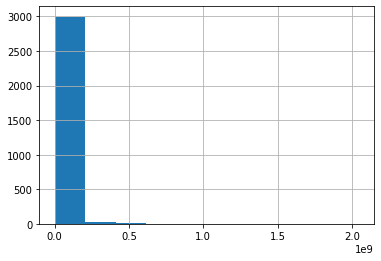

In [61]:
movies['cumulative'].hist()

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [97]:
movies

,release_month,release_year,country,language,production_co,runtime,budget,gross_usa,director,rating,...,Family,Musical,Mystery,Romance,Fantasy,History,Sci-Fi,Thriller,Music,War
0,March,2016,USA,English,Warner Bros.,151.0,250000000.0,330360194.0,Zack Snyder,65.0,...,0,0,0,0,0,0,1,0,0,0
1,February,2016,USA,English,Pyramania,127.0,140000000.0,31153464.0,Alex Proyas,54.0,...,0,0,0,0,1,0,0,0,0,0
2,June,2016,UK,English,Metro-Goldwyn-Mayer (MGM),106.0,20000000.0,56245075.0,Thea Sharrock,74.0,...,0,0,0,1,0,0,0,0,0,0
3,November,2016,Australia,English,Cross Creek Pictures,139.0,40000000.0,67209615.0,Mel Gibson,81.0,...,0,0,0,0,0,1,0,0,0,1
4,August,2016,USA,English,Atlas Entertainment,123.0,175000000.0,325100054.0,David Ayer,60.0,...,0,0,0,0,1,0,1,0,0,0
5,September,2017,UK,English,Twentieth Century Fox,141.0,104000000.0,100234838.0,Matthew Vaughn,67.0,...,0,0,0,0,0,0,0,0,0,0
6,December,2017,USA,English,Chernin Entertainment,105.0,84000000.0,174340174.0,Michael Gracey,76.0,...,0,1,0,0,0,0,0,0,1,0
7,November,2017,USA,English,Warner Bros.,120.0,300000000.0,229024295.0,Zack Snyder,64.0,...,0,0,0,0,1,0,1,0,0,0
8,September,2017,USA,English,New Line Cinema,135.0,35000000.0,327481748.0,Andy Muschietti,73.0,...,0,0,0,0,0,0,0,0,0,0
9,September,2018,USA,English,Atomic Monster,96.0,22000000.0,117450119.0,Corin Hardy,53.0,...,0,0,1,0,0,0,0,1,0,0


In [171]:
to_drop = ['title', 'release_month', 
           #'budget',
           'cumulative',
           'open_week', 
           'country', 
           'language', 
           'production_co', 
           'star_0',
           'star_1',
           'star_2',
           'star_3',
           'writer_0',
           'writer_1',
           'writer_2',
           'director']
data = movies.drop(to_drop, axis=1) # scale this for prediction on cumulative or gross_usa

In [172]:
data

,release_year,runtime,budget,gross_usa,rating,review_count,Adventure,Animation,Biography,Comedy,...,Family,Musical,Mystery,Romance,Fantasy,History,Sci-Fi,Thriller,Music,War
0,2016,151.0,250000000.0,330360194.0,65.0,591413.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2016,127.0,140000000.0,31153464.0,54.0,98286.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2016,106.0,20000000.0,56245075.0,74.0,184930.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2016,139.0,40000000.0,67209615.0,81.0,386225.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,2016,123.0,175000000.0,325100054.0,60.0,555709.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
5,2017,141.0,104000000.0,100234838.0,67.0,244315.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2017,105.0,84000000.0,174340174.0,76.0,209713.0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
7,2017,120.0,300000000.0,229024295.0,64.0,347561.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
8,2017,135.0,35000000.0,327481748.0,73.0,411748.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2018,96.0,22000000.0,117450119.0,53.0,102287.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data['gross_usa'], test_size=0.20, random_state=42)

x_test = X_test.drop('gross_usa', axis=1)
x_train = X_train.drop('gross_usa', axis=1)

In [174]:
regr = RandomForestRegressor()
regr.fit(x_train, y_train)

/Users/williamegan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [175]:
preds = regr.predict(x_test)

In [176]:
#MSE with budget
mean_squared_error(y_test, preds)

4.891745828393963e+16

In [166]:
#MSE without budget
mean_squared_error(y_test, preds)

6.422172196143785e+16

In [177]:
from sklearn.linear_model import LinearRegression

In [179]:
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)

0.9999999999999999

In [180]:
reg.coef_

array([ 8.11928897e+07, -2.19660732e+06,  9.31650714e-02, -1.53513749e+07,
        6.44246404e+02,  4.22318915e+08,  1.80415869e+08,  2.41409297e+08,
        9.74651908e+07,  3.14953779e+08,  1.13973249e+08, -1.84382683e+08,
        2.14494460e+08,  3.64798552e+08, -4.14763919e+08,  1.13973249e+08,
        3.18696259e+08, -3.00189536e+07,  6.83261433e+07,  7.93145095e+07,
        1.32339867e+07,  5.35530310e+08,  6.83261433e+07])

In [183]:
lin_pred = reg.predict(x_test)

In [184]:
mean_squared_error(y_test, lin_pred)

1.2488910218718077e+17

In [187]:
100%50

0